### 목표
- 타이타닉 데이터를 학습해서 생존/사망자를 예측해보자
- 머신러닝의 전체 과정을 이해하며 진행하자
- kaggle 경진대회에서 높은 순위를 차지해보자

##### 머신러닝 7과정
1. 문제정의(목표설정 / 생존자 예측)
2. 데이터 수집(kaggle에서 데이터 다운로드)
3. 데이터 전처리 ☆
4. 탐색적 데이터 분석 EDA (기술통계 확인, 변수간 상관관계 파악, 시각화

##### 1. 문제정의
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측

##### 2. 데이터 수집
- kaggle 데이터 활용
- train, test 데이터 불러오기

In [1]:
# 도구 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #시각화 라이브러리(그래프가 다양, 색감 화려)

In [4]:
# train, test 데이터 불러오기
# 변수명 train, test
# 인덱스를 'PassengerdId' 컬럼으로 설정
train = pd.read_csv('data/train.csv', index_col='PassengerId')
test = pd.read_csv('data/test.csv', index_col='PassengerId')

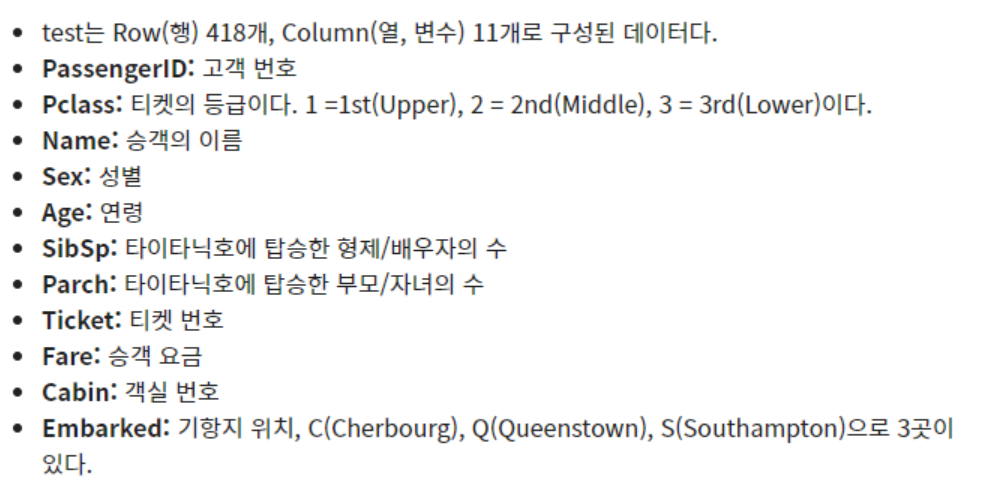 

In [5]:
# 데이터 크기 확인
print("훈련용데이터:", train.shape)
print("테스트용데이터", test.shape)

훈련용데이터: (891, 11)
테스트용데이터 (418, 10)


##### 3. 데이터 전처리
- 결측치 이상치 제거

In [6]:
# 결측치, 이상치 확인
train.info()
test.info()

# 결측치 확인 -> 채워주기
# train : Age, Cabin, Embarked
# test: Age, Cabin, Fare

# 데이터 타입 확인 > 머신러닝 학습을 위해 숫자형태로 변환 (인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- 결측치를 단순 기술통계량으로 채우지 않고 컬럼간의 특성과 상관관계를 이용해서 결측치를 채워주자!

In [10]:
# 기술통계량 확인
train['Age'].describe()
#714개 데이터
# 평균 약 29세 최대 80세
# 앞쪽으로 치우쳐져있는 데이터 형태

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# 문자열데이터 기술통계량 확인
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [13]:
# 조건을 줘서 위 B96 B98에 Cabin에 묵었던 인원 확인
# 데이터 추출 > 인덱싱, 슬라이싱 (인덱스) > 인덱스를 알아야함
# 조건을 통해서 참인 값들만 추출 > 불리언인덱싱
# 데이터[조건]
train[train['Cabin'] == 'B96 B98']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,B96 B98,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B96 B98,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S


In [14]:
# 탑승구 확인
train['Embarked'].describe()
# 결측치 2개
# 가장 많이 탑승한 항구는 S

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
# train 데이터에서 S 항구에서 탑승한 인원은 추출
train[train['Embarked'] == 'S']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,B96 B98,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,B96 B98,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S


In [19]:
# test 데이터의 기술통계량 확인
# Age, Fare, Cabin
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [17]:
test['Fare'].describe()
# 중위수와 평균데이터의 차이가 있는 편, 이상치 여부 확인

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [18]:
test['Cabin'].describe()
# 중복되지 않은 유일한 값들이 많이 존재
# 뚜렷한 특성을 보이지 않고있음

# 의미가 없으니까 컬럼을 제거할까?
# 삭제는 최후의 방법으로 사용

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

- 결측치 채우기

- Age 컬럼의 결측치를 채워보자
    - 나이 > 평균
    - 분포 치우쳐져있는 것을 확인 > 평균으로 채우게되면 신뢰성이 떨어지게 된다
    - 다른 컬럼들과 상관관계를 이용해서 결측치를 상세하게 채워보자

In [21]:
# 상관관계 확인
train.corr(numeric_only=True)
# Age데이터와 생존여부에 높은 상관관계를 가지는 Pclass컬럼을 활용해보자!
# 관련있는 성별 데이터도 함께 활용해서 Age 데이터 결측치를 채워보자!
# 기본지식, 상관관계, 기술통계량 등을 활용하여 결측치를 채우는 것을 추천

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


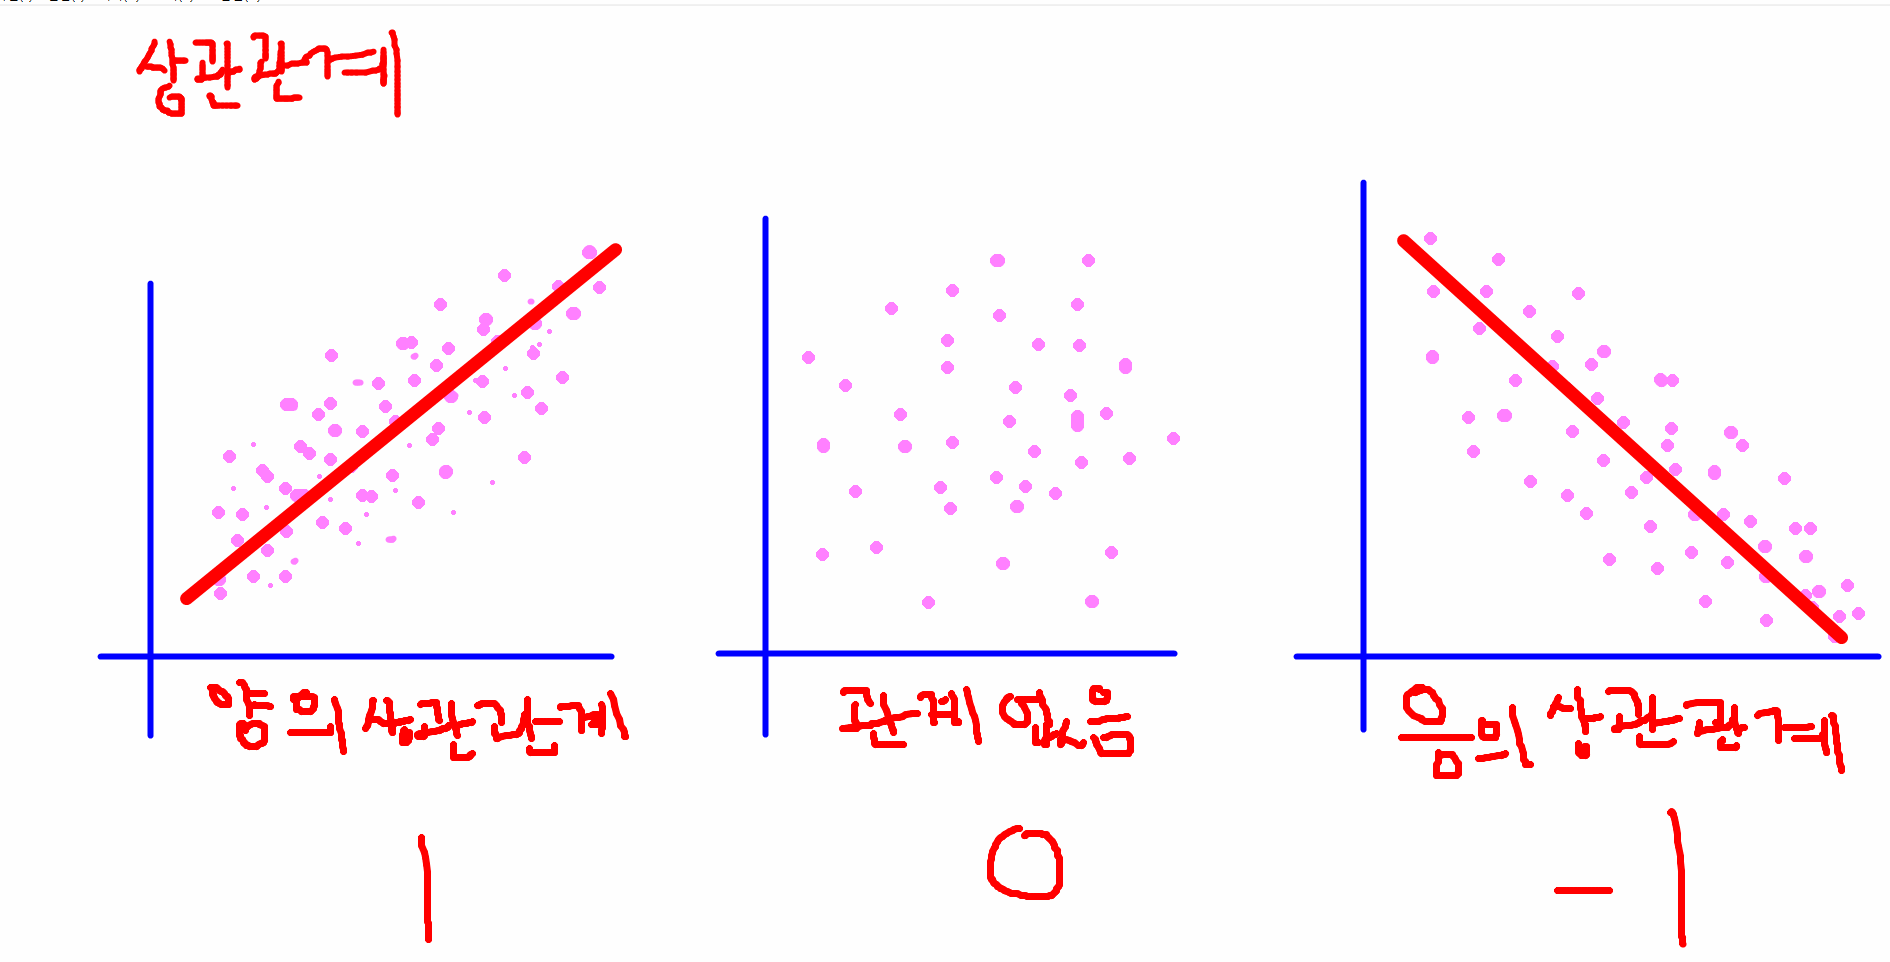

##### 상관관계
- -1 ~ 1 사이의 숫자를 출력
- -1에 가까울 수록 음의 상관관계, 1에 가까울 수록 양의 상관관계
- 0에 관게없음
- 숫자가 절대값 1에 가까울 수록 관련이 높은 컬럼들이다

In [31]:
# 피봇테이블: 컬럼들의 요약된 정보를 출력할 수 있게 해주는 표
pt1 = train.pivot_table(values = 'Age', # 데이터로 사용할 컬럼
                 index = ['Pclass', 'Sex'], # 데이터 요약시 사용할 컬럼
                 aggfunc='mean')
pt1
# 각 클래스별, 성별로 나이 평균 출력
#결측치를 채울 때 단순평균으로 채우는 것 보다는 관련있는 값으로 세분화해서 채워주기 위함

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [32]:
# 다중인덱싱/멀티인덱싱 -> 두 개 이상의 인덱스가 존재할 때 인덱싱 하는 방법
# df.loc[(앞인덱스, 뒤인덱스), 컬럼]
# 1등급 여성 나이 데이터 출력
pt1.loc[(1, 'female'), 'Age']

34.61176470588235

In [33]:
# 3등급 남성 나이 데이터 출력
pt1.loc[(3,'male'), 'Age']

26.507588932806325

In [34]:
# 2등급 여성 나이 데이터 출력
pt1.loc[(2,'female'), 'Age']

28.722972972972972

In [35]:
# age 결측치를 처리하는 함수 정의
def fill_age (data):
    # 만약 Age컬럼에 결측치가 있다면 피봇테이블에서 값을 찾아 넣어줘
    if pd.isna(data['Age']):
        return pt1.loc[(data['Pclass'],data['Sex']),'Age']
    # 그렇지 않으면 (값이 있음) 원래 값을 출력해줘
    else:
        return data['Age']

In [36]:
# 위 함수를 우리의 train에 적용
# apply: DataFrame에서 행 또는 열에 함수를 적용할 때 사용
# DataFrame명.apply(함수이름, 축설정)
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')

In [37]:
train['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    21
890    26
891    32
Name: Age, Length: 891, dtype: int64

In [38]:
# test 데이터도 결측치를 채워주자 (Age)
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')

In [39]:
test['Age']

PassengerId
892     34
893     47
894     62
895     27
896     22
        ..
1305    26
1306    39
1307    38
1308    26
1309    26
Name: Age, Length: 418, dtype: int64

In [40]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    i

-train 의 Embarked 채우기
    - 결측치 2개

In [41]:
# 데이터 확인해봤더니 가장 많이 승선한 항이 'S'항구
train['Embarked'].describe()
# 결측치 양에 비해 뚜렷한 데이터가 존재하므로
# 'S'데이터로 채워주기
# 데이터가 많으면 많을수록 한두개의 데이터는 영향을 크게 미치지 않기 때문

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [42]:
# 다른 항구의 개수도 확인
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
# 결측치를 'S'값으로 채워주기
# fillna(지정값) : 지정값으로 결측치를 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [44]:
# 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [45]:
test['Fare'].describe()
# 평균:35 최대값: 512 앞쪽에 데이터가 몰려있는 형태
# 전체평균으로 채우기에는 신뢰성이 떨어진다
# 상관관계 확인

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [46]:
# Fare 상관관계 확인
test.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [47]:
# 요약표>피벗테이블을 활용하여 확인
# Pclass, Sex 데이터를 통해 Fare 평균값을 확인
pt2 = test.pivot_table(values='Fare',
                      index=['Pclass', 'Sex'],
                      aggfunc='mean')
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [48]:
# 비어있는 값이 1개이기 때문에 함수생성 x
# test에서 비어있는 값만 출력해서 채워주기
# 조건: test 데이터에서 'Fare' 결측치인 사람(불리언인덱싱)
# isnull() 함수 사용하기
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [49]:
# 3등급 남성의 요금 평균을 가져와서 채워주기 (11.826350)
test['Fare'] = test['Fare'].fillna(11.826350)

In [50]:
# 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 결측치 처리 (train, test 둘다 처리)
- Cabin 문자열
- Cabin 컬럼은 실제 데이터보다 결측치가 더 많음(컬럼자체를 삭제하는 것도 한 방법)
- 시각화를 통해서 삭제여부를 확인

In [52]:
# 중복없이 값 출력
train['Cabin'].unique()
# 전체적으로 데이터 중복이 없음
# 모든값들이 알파벳을 가지고 있는 것을 확인 > 알파벳 규칙
# 알파벳만 추출 (층)

array(['B96 B98'], dtype=object)

In [54]:
# train, test 데이터 모두에 결측치에는 임의의 알파벳 'M' 채우고
# 'Deck' 새로운 컬럼을 생성해주기
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [55]:
train['Deck']

PassengerId
1      B96 B98
2      B96 B98
3      B96 B98
4      B96 B98
5      B96 B98
        ...   
887    B96 B98
888    B96 B98
889    B96 B98
890    B96 B98
891    B96 B98
Name: Deck, Length: 891, dtype: object

In [56]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,B96 B98
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,B96 B98,C,B96 B98
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,B96 B98
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,B96 B98,S,B96 B98
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,B96 B98
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S,B96 B98
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B96 B98,S,B96 B98
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,B96 B98,S,B96 B98


In [57]:
# 'Deck'컬럼에서 알파벳만 출력
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [58]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis = 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,B
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,B
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,B
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,B
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,B
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,B
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,B


In [59]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    o